In [184]:
import spacy
import pandas as pd
nlp = spacy.load('en_core_web_sm')
import re
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report,confusion_matrix, f1_score, roc_auc_score

In [141]:
path = r'C:\Users\pohiy\Desktop\Datasets\SPAM text message 20170820 - Data.csv'
df =pd.read_csv(path)

In [143]:
print(df.shape)
print(df.head())


(5572, 2)
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [144]:
# Lowercasing
def lowercasing(df , column_name):
    df[column_name] = df[column_name].str.lower()
    return df

# Removing punctuation
def removing_punction(df , column_name):
    pattern = r'[^\w\s]'
    df[column_name] = df[column_name].apply(lambda x: re.sub(pattern, '', x))
    return df

# Remove URLS
def remove_url(df , column_name):
    url_pattern = r'http[s]?://\S+|www\.\S+'
    df[column_name] = df[column_name].apply(lambda x: re.sub(url_pattern, '', x))
    return df
    
# Removing numbers  
def remove_numbers(df, column_name):
    pattern =r'\d+'
    df[column_name] = df[column_name].apply(lambda x: re.sub(pattern, '', x))
    return df

# Removing stop words
def remove_stop_words(df, column_name):
    def remove_stops(text):
        doc = nlp(text)
        filtered_text = [token.text for token in doc if not token.is_stop]
        return ' '.join(filtered_text)
    df[column_name] = df[column_name].apply(remove_stops)
    return df

# Lemmatization
def lemmatization(df , column_name):
    def lemmatize(text):
        doc = nlp(text)
        return ' '.join([token.lemma_ for token in doc])
    df[column_name] = df[column_name].apply(lemmatize) 
    return df   
    
def convert_emojis_and_emoticons(df , column_name):
    def convert(text):
        text_with_emojis = emoji.demojize(text)
        emoticon_dict={
            ':)': 'smiling face',
            ':(': 'sad face',
            ':D': 'grinning face',
            ':P': 'playful face',
            ':-)': 'smiling face',
            ':-(': 'sad face',
            ':-D': 'grinning face',
            ':-P': 'playful face'
        }
        for emoticons, representation in emoticon_dict.items():
            text_with_emojis = text_with_emojis.replace(emoticons, representation)
            return text_with_emojis
    df[column_name] = df[column_name].apply(convert)
    return df

    
# vectorization
def vectorization(df , column_name):
    tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(), lowercase = False)
    vectorized_data = tfidf_vectorizer.fit_transform(df[column_name])
    return vectorized_data, tfidf_vectorizer


In [145]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [146]:
df_lowercase = lowercasing(df, 'Message')
print("Lowerrcasing done ------------------------------->")
df_p = removing_punction(df, 'Message')
print('Puncatuations has been removed ------------------------------->')
df_rem_url = remove_url(df_p, 'Message')
print("URLs from text have been removed----------------------------->")
df_rem_num = remove_numbers(df_rem_url, 'Message')
print("Numbers have removed-------------------------------->")
df_rem_stops = remove_stop_words(df_rem_num, 'Message')
print("Stopwords have been removed----------------------------------->")
def_rem_emo = convert_emojis_and_emoticons(df_rem_stops, 'Message')
print('Emojis and emoticos have been converted into text-------------------------------->')


df_lemma = lemmatization(def_rem_emo, 'Message')
print("lemmatization done------------------------------->")


Lowerrcasing done ------------------------------->
Puncatuations has been removed ------------------------------->
URLs from text have been removed----------------------------->
Numbers have removed-------------------------------->
Stopwords have been removed----------------------------------->
Emojis and emoticos have been converted into text-------------------------------->


  Category                                            Message
0      ham  jurong point crazy available bugis n great wor...
1      ham                              ok lar joke wif u oni
2     spam  free entry    wkly comp win fa cup final tkts ...
3      ham                                u dun early hor u c
4      ham                          nah not think go usf life
Index(['ham', 'spam'], dtype='object', name='Category')
[4825  747]


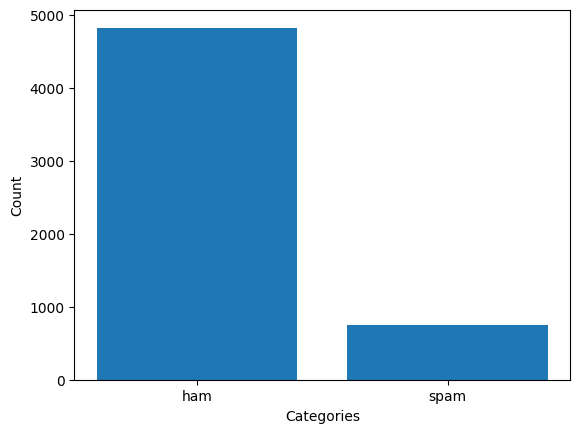

In [172]:
print(df.head())
val_count = df.Category.value_counts()
print(val_count.index)
print(val_count.values)

plt.bar(val_count.index, val_count.values)
plt.xlabel("Categories",)
plt.ylabel("Count")
plt.show()

In [173]:
df['Category'] = df['Category'].map({'ham':0,'spam':1})

In [174]:
df.head()

,Category,Message
0,0,jurong point crazy available bugis n great wor...
1,0,ok lar joke wif u oni
2,1,free entry wkly comp win fa cup final tkts ...
3,0,u dun early hor u c
4,0,nah not think go usf life


In [176]:
X_vectorized_data, vectorizer = vectorization(df_lemma, 'Message')


X_train, X_test, y_train, y_test = train_test_split(X_vectorized_data, df['Category'], test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\pohiy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [183]:
y_pred = model.predict(X_test)


In [186]:
print('Accuracy Score=', accuracy_score(y_test, y_pred))
print('Recall Score=', recall_score(y_test, y_pred))
print('Precision Score=', precision_score(y_test, y_pred))
print('F1 Score=', f1_score(y_test, y_pred))
print('Roc auc=', roc_auc_score(y_test, y_pred))
print('Confision matrix=\n', confusion_matrix(y_test, y_pred))


Accuracy Score= 0.9623318385650225
Recall Score= 0.7181208053691275
Precision Score= 1.0
F1 Score= 0.8359375
Roc auc= 0.8590604026845637
Confision matrix=
 [[966   0]
 [ 42 107]]
